In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.copy_on_write = True

In [3]:
org_df = sns.load_dataset('titanic')
org_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
print("Shape : ", org_df.shape)
print("Info : ", org_df.info())

Shape :  (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Info :  None


In [5]:
'''
Total Row : 891 : 0 to 890
Total Column : 15
numeric dtypes : int, float
categorial dtypes : object, category

colums
int : 4
float : 2
bool : 2
object : 5
category : 2
'''

'\nTotal Row : 891 : 0 to 890\nTotal Column : 15\nnumeric dtypes : int, float\ncategorial dtypes : object, category\n\ncolums\nint : 4\nfloat : 2\nbool : 2\nobject : 5\ncategory : 2\n'

In [6]:
numeric_features = org_df.select_dtypes(include=['int', 'float'])
categorial_features = org_df.select_dtypes(include=['object', 'category'])
print(f"Numeric Data : \n{numeric_features}")
print()
print(f"categorial Data : \n{categorial_features}")

Numeric Data : 
     survived  pclass   age  sibsp  parch     fare
0           0       3  22.0      1      0   7.2500
1           1       1  38.0      1      0  71.2833
2           1       3  26.0      0      0   7.9250
3           1       1  35.0      1      0  53.1000
4           0       3  35.0      0      0   8.0500
..        ...     ...   ...    ...    ...      ...
886         0       2  27.0      0      0  13.0000
887         1       1  19.0      0      0  30.0000
888         0       3   NaN      1      2  23.4500
889         1       1  26.0      0      0  30.0000
890         0       3  32.0      0      0   7.7500

[891 rows x 6 columns]

categorial Data : 
        sex embarked   class    who deck  embark_town alive
0      male        S   Third    man  NaN  Southampton    no
1    female        C   First  woman    C    Cherbourg   yes
2    female        S   Third  woman  NaN  Southampton   yes
3    female        S   First  woman    C  Southampton   yes
4      male        S   Third

In [7]:
'''
Target Variable : Survived (0 = died, 1 = sue=rvived)
feature variable : age, sex, pclass(class), fare(price), embarked(town)  
'''

'\nTarget Variable : Survived (0 = died, 1 = sue=rvived)\nfeature variable : age, sex, pclass(class), fare(price), embarked(town)  \n'

In [8]:
df = org_df.loc[:, ['survived', 'age', 'sex', 'pclass', 'class', 'fare', 'embarked', 'embark_town']]
df

,survived,age,sex,pclass,class,fare,embarked,embark_town
0,0,22.0,male,3,Third,7.2500,S,Southampton
1,1,38.0,female,1,First,71.2833,C,Cherbourg
2,1,26.0,female,3,Third,7.9250,S,Southampton
3,1,35.0,female,1,First,53.1000,S,Southampton
4,0,35.0,male,3,Third,8.0500,S,Southampton
...,...,...,...,...,...,...,...,...
886,0,27.0,male,2,Second,13.0000,S,Southampton
887,1,19.0,female,1,First,30.0000,S,Southampton
888,0,NaN,female,3,Third,23.4500,S,Southampton
889,1,26.0,male,1,First,30.0000,C,Cherbourg


In [9]:
print(df['sex'].unique())
print(df['sex'].value_counts())
print(df['class'].value_counts(ascending=True))
print(df['embarked'].value_counts())

['male' 'female']
sex
male      577
female    314
Name: count, dtype: int64
class
Second    184
First     216
Third     491
Name: count, dtype: int64
embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [33]:
print(df['survived'].value_counts())
# 342 survived

survived
0    549
1    342
Name: count, dtype: int64


In [10]:
# checking null values
df.isna().sum()

survived         0
age            177
sex              0
pclass           0
class            0
fare             0
embarked         2
embark_town      2
dtype: int64

In [27]:
# filling null values
val = int(df['age'].mean())
df['age'] = df['age'].fillna(val)
print(df['age'].isna().sum())

0


In [28]:
df['embark_town'] = df['embark_town'].fillna(np.random.choice(df['embark_town']))
print(df['embark_town'].isna().sum())

0


In [29]:
df['embarked']  = [x.split()[0] for x in df['embark_town']]
print(df['embarked'].isna().sum())

0


In [30]:
df.isna().sum()

survived       0
age            0
sex            0
pclass         0
class          0
fare           0
embarked       0
embark_town    0
dtype: int64

In [31]:
df.describe()

,survived,age,pclass,fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,2.308642,32.204208
std,0.486592,13.002015,0.836071,49.693429
min,0.000000,0.420000,1.000000,0.000000
25%,0.000000,22.000000,2.000000,7.910400
50%,0.000000,29.699118,3.000000,14.454200
75%,1.000000,35.000000,3.000000,31.000000
max,1.000000,80.000000,3.000000,512.329200


In [40]:
#  fare : 512 which is outlier or VIP

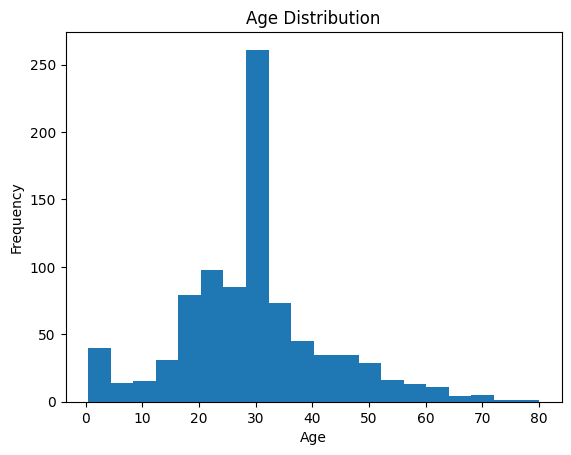

In [42]:
# ploting
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

class
Third     491
First     216
Second    184
Name: count, dtype: int64


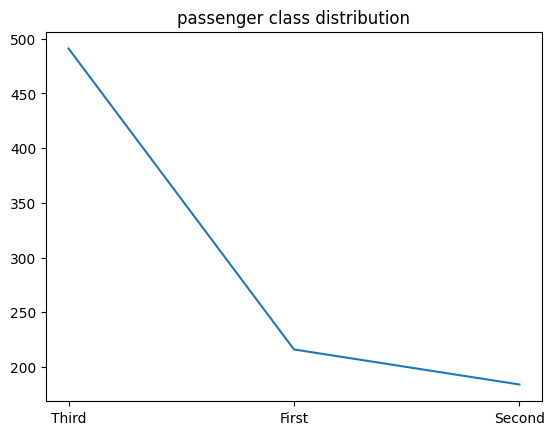

In [53]:
class_count = df['class'].value_counts()
print(class_count)
plt.plot(class_count)
plt.title('passenger class distribution')
plt.show()

In [54]:
df.corr(numeric_only=True)

,survived,age,pclass,fare
survived,1.000000,-0.069809,-0.338481,0.257307
age,-0.069809,1.000000,-0.331339,0.091566
pclass,-0.338481,-0.331339,1.000000,-0.549500
fare,0.257307,0.091566,-0.549500,1.000000
